In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras import regularizers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, Input

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos.h5 to datos.h5


In [ ]:
def load_dataset():
  with h5py.File('datos.h5', 'r') as f:
    train_set_x_orig = f['x_train'][:]
    train_set_y_orig = f['y_train'][:]
    test_set_x_orig = f['x_test'][:]
    test_set_y_orig = f['y_test'][:]

  #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
  classes = np.array(["non-pizza", "pizza"])
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

  """
  train_dataset = h5py.File('drive/MyDrive/datasets/train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('drive/MyDrive/datasets/test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes

  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
  """

In [ ]:
# Loading the data (cat/non-cat)
train_set_x, train_set_y, remaining_set_x, remaining_set_y, classes = load_dataset()

In [ ]:
test_set_x, validation_set_x, test_set_y, validation_set_y = train_test_split(remaining_set_x, remaining_set_y, test_size=0.5, random_state=42)

Esta vez se emplea el tercer conjunto (validación)

y = 1.0, it's a 'pizza' picture.


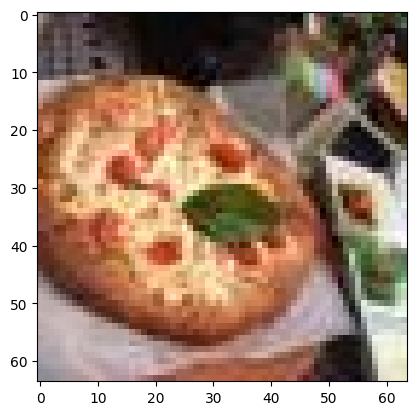

In [ ]:
# Example of a picture
index = 5
plt.imshow(train_set_x[index])
print ("y = " + str(train_set_y[int(index)]) + ", it's a '" + classes[int(train_set_y[index])] +  "' picture.")

La mecánica general del siguiente tuneo de hiperparámetros es emplear el conjunto de entrenamiento para entrenar al modelo y validar la situación del modelo con un conjunto diferente que es el de validación. De este modo se evita data leakage y se puede probar con mayor seguridad que el modelo se comporta según lo esperado. El conjunto de prueba se reservará para el final, de modo que sirva para tener una métrica general del rendimiento del modelo después de afinar todos los aspectos.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Rescaling, Conv2D, BatchNormalization, Dropout, MaxPool2D

In [ ]:
epoch_number = 60

In [ ]:
original_model = Sequential()

original_model.add(Input(shape=(64, 64, 3)))
original_model.add(Flatten())
original_model.add(Rescaling(1./255))
original_model.add(Dense(64, activation='sigmoid'))
original_model.add(Dense(1, activation='sigmoid'))

original_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
original_hist = original_model.fit(train_set_x, train_set_y, epochs=epoch_number, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5118 - loss: 0.6906 - val_accuracy: 0.6215 - val_loss: 0.6719
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6112 - loss: 0.6613 - val_accuracy: 0.6338 - val_loss: 0.6616
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6610 - loss: 0.6355 - val_accuracy: 0.6277 - val_loss: 0.6602
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6333 - loss: 0.6375 - val_accuracy: 0.6246 - val_loss: 0.6552
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6922 - loss: 0.6087 - val_accuracy: 0.6338 - val_loss: 0.6557
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6819 - loss: 0.6161 - val_accuracy: 0.6185 - val_loss: 0.6687
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6836 - loss: 0.6004 - val_accuracy: 0.6154 - val_loss: 0.6570
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6801 - loss: 0.6048 - val_accuracy: 0.6277 - v

In [ ]:
new_model = Sequential()

new_model.add(Input(shape=(64, 64, 3)))
new_model.add(Flatten())
new_model.add(Rescaling(1./255))
new_model.add(Dense(64, activation='sigmoid'))
new_model.add(Dense(64, activation='sigmoid'))
new_model.add(Dense(64, activation='sigmoid'))
new_model.add(Dense(1, activation='sigmoid'))

new_model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist = new_model.fit(train_set_x, train_set_y, epochs=epoch_number, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4799 - loss: 0.9627 - val_accuracy: 0.5077 - val_loss: 0.7373
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5043 - loss: 0.7234 - val_accuracy: 0.5077 - val_loss: 0.6956
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5066 - loss: 0.6951 - val_accuracy: 0.5015 - val_loss: 0.6927
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4953 - loss: 0.6935 - val_accuracy: 0.5477 - val_loss: 0.6927
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5223 - loss: 0.6932 - val_accuracy: 0.5662 - val_loss: 0.6926
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5258 - loss: 0.6928 - val_accuracy: 0.4954 - val_loss: 0.6930
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5017 - loss: 0.6929 - val_accuracy: 0.5046 - val_loss: 0.6927
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5288 - loss: 0.6926 - val_accuracy: 0.4985 - v

In [ ]:
#epochs = range(1, epoch_number+1)
#original_val_loss = original_hist.history['val_loss']
#new_model_val_loss = new_hist.history['val_loss']

# b+ is for "blue cross"
#plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
#plt.plot(epochs, new_model_val_loss, 'bo', label='New model')
#plt.xlabel('Epochs')
#plt.ylabel('Validation loss')
#plt.legend()

#plt.show()

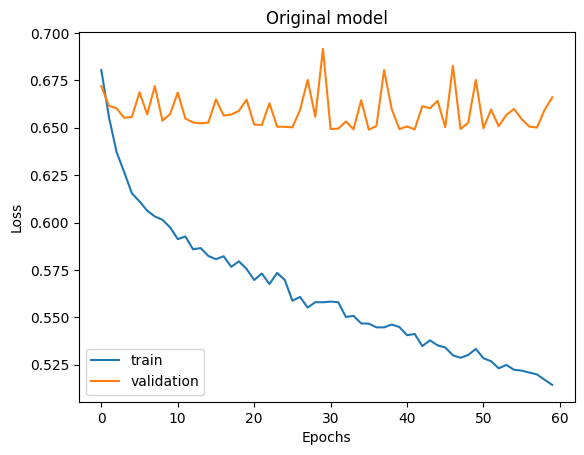

In [ ]:
train_mse = original_model.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = original_model.evaluate(validation_set_x, validation_set_y, verbose=0)
#print('Train: %.3f, Validation: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('Original model')
plt.plot(original_hist.history['loss'], label='train')
plt.plot(original_hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se toma como modelo original el presentado en la entrega anterior. Se observa que muy rápidamente en el entrenamiento se empieza a reducir el error en el conjunto de entrenamiento, sin reducir el de validación. Esto puede ser señal de overfitting porque la red está empezando a memorizar el conjunto de entrenamiento y a perder capacidad de generalizar en un conjunto nuevo como lo es el de validación.

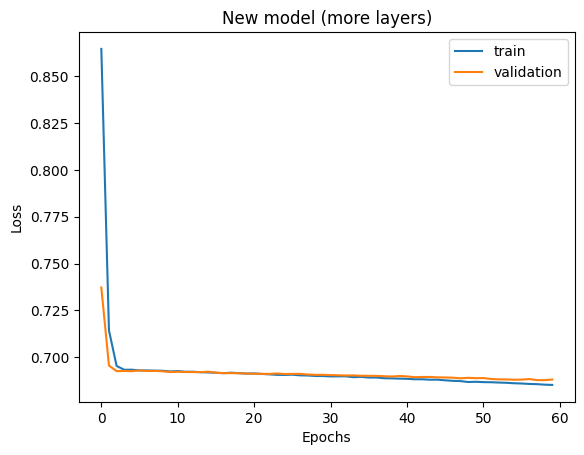

In [ ]:
train_mse = new_model.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model.evaluate(validation_set_x, validation_set_y, verbose=0)
#print('Train: %.3f, Validation: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('New model (more layers)')
plt.plot(new_hist.history['loss'], label='train')
plt.plot(new_hist.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Siguiendo los consejos dados para la entrega, añadir más capas incrementa la capacidad de representación de la red y se observa como el error decrece tanto en el conjunto de entrenamiento como en el de validación.

In [ ]:
new_model2 = Sequential()

new_model2.add(Input(shape=(64, 64, 3)))
new_model2.add(Flatten())
new_model2.add(Rescaling(1./255))
new_model2.add(Dense(16, activation='sigmoid'))
new_model2.add(Dense(16, activation='sigmoid'))
new_model2.add(Dense(4, activation='sigmoid'))
new_model2.add(Dense(1, activation='sigmoid'))

new_model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist2 = new_model2.fit(train_set_x, train_set_y, epochs=epoch_number, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4957 - loss: 0.8011 - val_accuracy: 0.5077 - val_loss: 0.7722
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4999 - loss: 0.7735 - val_accuracy: 0.5077 - val_loss: 0.7540
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4886 - loss: 0.7641 - val_accuracy: 0.5077 - val_loss: 0.7405
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5075 - loss: 0.7381 - val_accuracy: 0.5077 - val_loss: 0.7304
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4892 - loss: 0.7391 - val_accuracy: 0.5077 - val_loss: 0.7227
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5007 - loss: 0.7246 - val_accuracy: 0.5077 - val_loss: 0.7166
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5076 - loss: 0.7158 - val_accuracy: 0.5077 - val_loss: 0.7117
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5072 - loss: 0.7111 - val_accuracy: 0.5077 - v

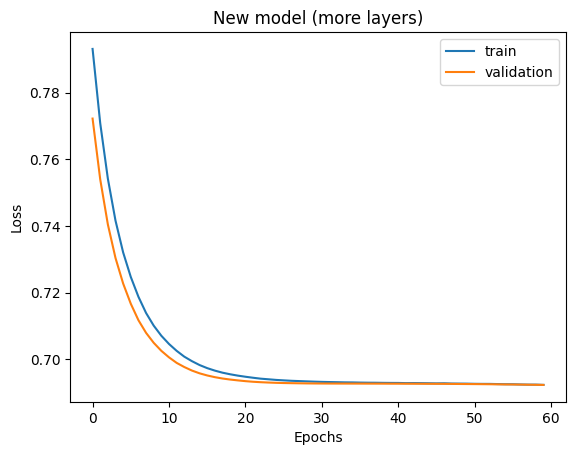

In [ ]:
train_mse = new_model2.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model2.evaluate(validation_set_x, validation_set_y, verbose=0)
#print('Train: %.3f, Validation: %.3f' % (train_mse, test_mse))
# plot loss during training
plt.title('New model (more layers)')
plt.plot(new_hist2.history['loss'], label='train')
plt.plot(new_hist2.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Luego, siguiendo la idea de mantener la red pequeña, se redujo considerablemente la cantidad de neuronas en las capas. Como se observa, la pérdida se minimiza en ambos conjuntos y se obtuvo una accuracy similar a la de la versión anterior. La ventaja está en que se reduce la posibilidad de overfitting porque si se excede el número de neuronas la red puede literalmente llegar al punto de generar un mapa interno para representar al conjunto de entrenamiento y terminar memorizándolo.

In [ ]:
new_model3 = Sequential()

new_model3.add(Input(shape=(64, 64, 3)))
new_model3.add(Flatten())
new_model3.add(Rescaling(1./255))
new_model3.add(Dense(16, activation='sigmoid'))
new_model3.add(Dense(16, activation='sigmoid'))
new_model3.add(Dense(4, activation='sigmoid'))
new_model3.add(Dense(1, activation='sigmoid'))

new_model3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist3 = new_model3.fit(train_set_x, train_set_y, epochs=epoch_number*8, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5044 - loss: 0.6988 - val_accuracy: 0.4923 - val_loss: 0.7000
Epoch 2/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5142 - loss: 0.6939 - val_accuracy: 0.4923 - val_loss: 0.6972
Epoch 3/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4967 - loss: 0.6945 - val_accuracy: 0.4923 - val_loss: 0.6956
Epoch 4/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5144 - loss: 0.6911 - val_accuracy: 0.4923 - val_loss: 0.6946
Epoch 5/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4970 - loss: 0.6922 - val_accuracy: 0.4923 - val_loss: 0.6938
Epoch 6/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4901 - loss: 0.6921 - val_accuracy: 0.4923 - val_loss: 0.6933
Epoch 7/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4838 - loss: 0.6916 - val_accuracy: 0.4954 - val_loss: 0.6930
Epoch 8/480
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5154 - loss: 0.6898 - val_accuracy: 0.5015 

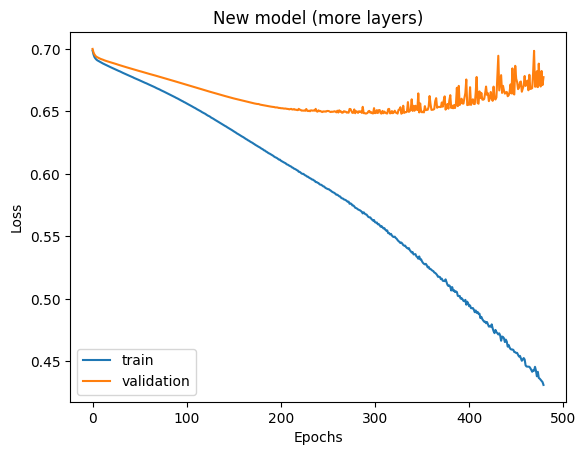

In [ ]:
train_mse = new_model3.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model3.evaluate(validation_set_x, validation_set_y, verbose=0)
plt.title('New model (more layers)')
plt.plot(new_hist3.history['loss'], label='train')
plt.plot(new_hist3.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Sin embargo, es importante notar que si se utiliza una gran cantidad de épocas en comparación con las anteriores, eventualmente llega el punto en que el sistema empieza a memorizar. Si nos quedamos en el lado en el que no hay memorizacion, a pesar de que durante ese intervalo la tendencia del error es decreciente, sigue habiendo un alto nivel de error. Esto podría conducir a un subajuste (lo contrario al sobreajuste).

Por lo anterior, se cambia a una arquitectura más compleja para poder continuar

In [ ]:
mobilenet=MobileNet(
  input_shape=(64,64,3),
  include_top=False,
  weights='imagenet'
)

<ipython-input-11-77f752fa89e7>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet=MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, Input

new_model4 = Sequential()
new_model4.add(mobilenet)
new_model4.add(GlobalAveragePooling2D())
new_model4.add(Flatten(input_shape=(64,64,3)))
new_model4.add(Dense(4, activation='relu',input_shape=(64,64,3)))
new_model4.add(Dense(4, activation='relu'))
new_model4.add(Dense(1, activation='sigmoid'))

new_model4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist4 = new_model4.fit(train_set_x, train_set_y, epochs=10, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5050 - loss: 0.7361 - val_accuracy: 0.6062 - val_loss: 0.6723
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6342 - loss: 0.6100 - val_accuracy: 0.6585 - val_loss: 0.6544
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7168 - loss: 0.5333 - val_accuracy: 0.6615 - val_loss: 0.6342
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7900 - loss: 0.4840 - val_accuracy: 0.6923 - val_loss: 0.6211
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8567 - loss: 0.4558 - val_accuracy: 0.7631 - val_loss: 0.5795
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9047 - loss: 0.4062 - val_accuracy: 0.7908 - val_loss: 0.5523
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9287 - loss: 0.3807 - val_accuracy: 0.7969 - val_loss: 0.5368
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9436 - loss: 0.3528 - val_accuracy: 0.8185 - val_loss: 0.5197
Epo

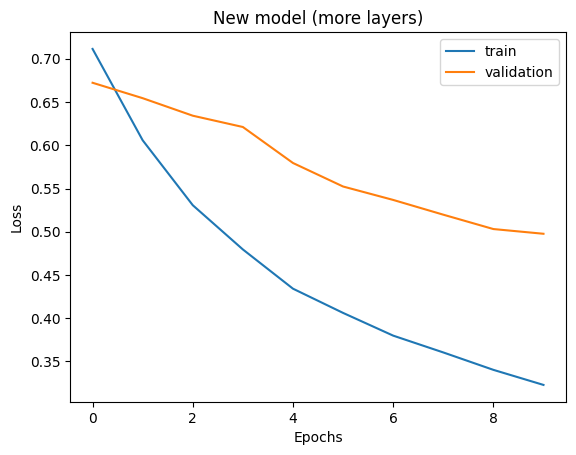

In [ ]:
train_mse = new_model4.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model4.evaluate(validation_set_x, validation_set_y, verbose=0)
plt.title('New model (more layers)')
plt.plot(new_hist4.history['loss'], label='train')
plt.plot(new_hist4.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
new_model5 = Sequential()
new_model5.add(mobilenet)
new_model5.add(GlobalAveragePooling2D())
new_model5.add(Flatten(input_shape=(64,64,3)))
new_model5.add(Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(64,64,3)))
new_model5.add(Dropout(0.2))
new_model5.add(Dense(4, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
new_model5.add(Dropout(0.2))
new_model5.add(Dense(1, activation='sigmoid'))

new_model5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist5 = new_model5.fit(train_set_x, train_set_y, epochs=10, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5378 - loss: 0.7360 - val_accuracy: 0.6523 - val_loss: 0.6567
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7465 - loss: 0.5794 - val_accuracy: 0.7292 - val_loss: 0.6220
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7854 - loss: 0.5250 - val_accuracy: 0.7631 - val_loss: 0.6002
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8455 - loss: 0.4859 - val_accuracy: 0.7631 - val_loss: 0.5742
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9038 - loss: 0.4418 - val_accuracy: 0.7723 - val_loss: 0.5541
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9062 - loss: 0.4227 - val_accuracy: 0.7877 - val_loss: 0.5394
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9325 - loss: 0.3977 - val_accuracy: 0.7969 - val_loss: 0.5276
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9350 - loss: 0.3791 - val_accuracy: 0.7938 - val_loss:

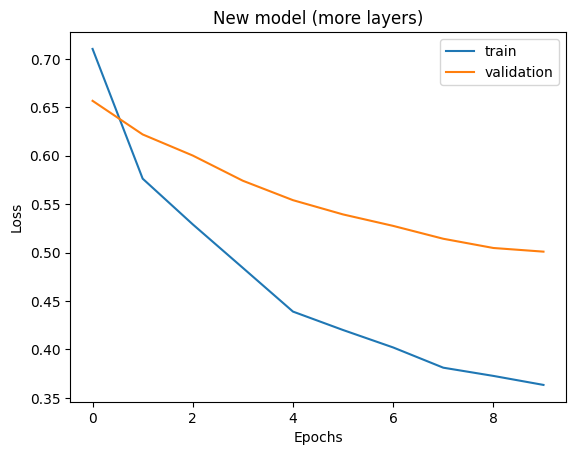

In [ ]:
train_mse = new_model5.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model5.evaluate(validation_set_x, validation_set_y, verbose=0)
plt.title('New model (more layers)')
plt.plot(new_hist5.history['loss'], label='train')
plt.plot(new_hist5.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se observa que una vez aplicadas las técnicas de regularización (L2 y dropout) se previene la brecha que antes se iba generando entre train y validation. Aunque eventualmente reaparece el problema de forma menos marcada.

In [ ]:
new_model6 = Sequential()
new_model6.add(mobilenet)
new_model6.add(GlobalAveragePooling2D())
new_model6.add(Flatten(input_shape=(64,64,3)))
new_model6.add(Dense(4, kernel_regularizer=regularizers.l2(0.25), activation='relu',input_shape=(64,64,3)))
new_model6.add(Dropout(0.3))
new_model6.add(Dense(4, kernel_regularizer=regularizers.l2(0.25), activation='relu'))
new_model6.add(Dropout(0.3))
new_model6.add(Dense(1, activation='sigmoid'))

new_model6.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
new_hist6 = new_model6.fit(train_set_x, train_set_y, epochs=30, batch_size=64, validation_data=(validation_set_x, validation_set_y))

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5903 - loss: 3.5864 - val_accuracy: 0.7692 - val_loss: 3.0919
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.7518 - loss: 2.9022 - val_accuracy: 0.8308 - val_loss: 2.5437
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8204 - loss: 2.3864 - val_accuracy: 0.8246 - val_loss: 2.1245
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8178 - loss: 1.9581 - val_accuracy: 0.8031 - val_loss: 1.8143
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8090 - loss: 1.6622 - val_accuracy: 0.8092 - val_loss: 1.5527
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8055 - loss: 1.3929 - val_accuracy: 0.8369 - val_loss: 1.3202
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8084 - loss: 1.2165 - val_accuracy: 0.8523 - val_loss: 1.1442
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8315 - loss: 1.0311 - val_accuracy: 0.8677 - val_loss:

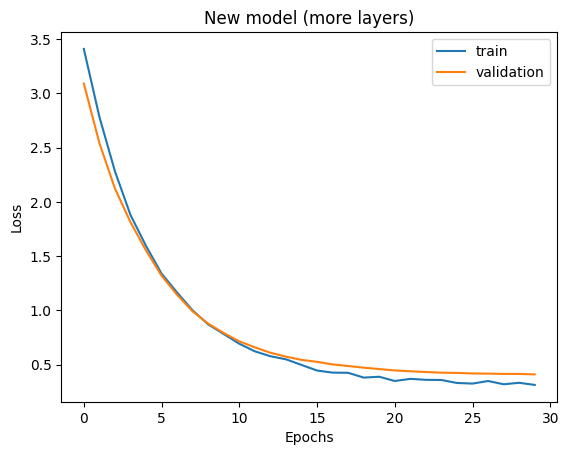

In [ ]:
train_mse = new_model6.evaluate(train_set_x, train_set_y, verbose=0)
test_mse = new_model6.evaluate(validation_set_x, validation_set_y, verbose=0)
plt.title('New model (more layers)')
plt.plot(new_hist6.history['loss'], label='train')
plt.plot(new_hist6.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Se empleó dropout y regularización más fuertes, lo que permitió incrementar la cantidad de épocas de entrenamiento sin overfitting. A este resultado se llegó iterando los valores manualmente e identificando puntos en los que era mejor aplicar early stopping.

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
  model = Sequential()
  model.add(mobilenet)
  model.add(GlobalAveragePooling2D())
  model.add(Flatten(input_shape=(64,64,3)))
  model.add(Dense(4, kernel_regularizer=regularizers.l2(0.25), activation='relu',input_shape=(64,64,3)))
  model.add(Dropout(0.3))
  model.add(Dense(4, kernel_regularizer=regularizers.l2(0.25), activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(
    optimizer=keras.optimizers.SGD(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )
  return model

tuner = kt.BayesianOptimization(
  build_model,
  objective='val_accuracy',
  max_trials=3,
  hyperparameters=None,
  project_name='my_project'
)

tuner.search(
  train_set_x, train_set_y,
  epochs=25,
  validation_data=(validation_set_x, validation_set_y),
  batch_size=64
)

best_model = tuner.get_best_models(num_models=1)[0]
best_model.evaluate(validation_set_x, validation_set_y)

Trial 7 Complete [00h 16m 21s]
val_accuracy: 0.5569230914115906

Best val_accuracy So Far: 0.8553845882415771
Total elapsed time: 02h 32m 05s
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8539 - loss: 0.5483


[0.5437958240509033, 0.8553845882415771]

In [ ]:
best_model.evaluate(test_set_x, test_set_y)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8604 - loss: 0.5383


[0.5228891968727112, 0.8888888955116272]